# TLC data

In [ ]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
df = pd.read_parquet('../data/tlc_data/')
df.head()

In [27]:
df.shape

(43575472, 19)

In [30]:
# tpep_pickup_datetime tpep_dropoff_datetime trip_distance PULocationID DOLocationID payment_type fare_amount tip_amount
sub_df = df[['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance','PULocationID','DOLocationID',\
             'payment_type','fare_amount','tip_amount']]
sub_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,2,8.0,0.00
1,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,238,151,2,3.0,0.00
2,2021-01-01 00:43:30,2021-01-01 01:11:06,14.70,132,165,1,42.0,8.65
3,2021-01-01 00:15:48,2021-01-01 00:31:01,10.60,138,132,1,29.0,6.05
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,1,16.5,4.06


In [31]:
sub_df.to_parquet('../data/processed_data/selected_column.parquet', compression='gzip')

In [32]:
sub_df = pd.read_parquet('../data/processed_data/selected_column.parquet')
sub_df.shape

(43575472, 8)

In [33]:
sub_df.isnull().sum() # check missing value

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
tip_amount               0
dtype: int64

In [34]:
# trip_distance
sub_df = sub_df[sub_df.trip_distance > 0]
sub_df.shape

(43023587, 8)

In [35]:
# PULocationID
print(sub_df.PULocationID.min())
print(sub_df.PULocationID.max())

1
265


NameError: name 'sub_df' is not defined

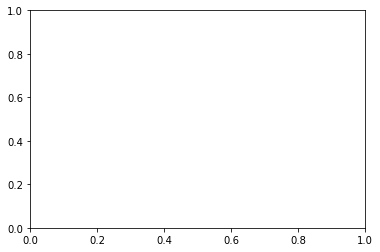

In [22]:
# payment_type 
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(sub_df.payment_type, bins=6, range=(1, 7), align='left', edgecolor="white")
plt.show()

In [37]:
# only consider cash and credit card payment
sub_df = sub_df[(sub_df['payment_type'] == 1) | (sub_df['payment_type'] == 2)]
sub_df.shape

(40836434, 8)

In [38]:
# fare_amount and tip_amount
sub_df[['fare_amount', 'tip_amount']].describe()

,fare_amount,tip_amount
count,4.083643e+07,4.083643e+07
mean,1.302373e+01,2.431365e+00
std,1.188997e+01,2.812241e+00
min,-6.525000e+02,-9.860000e+01
25%,6.500000e+00,2.500000e-01
50%,9.500000e+00,2.050000e+00
75%,1.450000e+01,3.060000e+00
max,6.968000e+03,1.140440e+03


In [39]:
sub_df = sub_df[sub_df.fare_amount >= 0]
sub_df = sub_df[sub_df.tip_amount >= 0]
sub_df.shape

(40803827, 8)

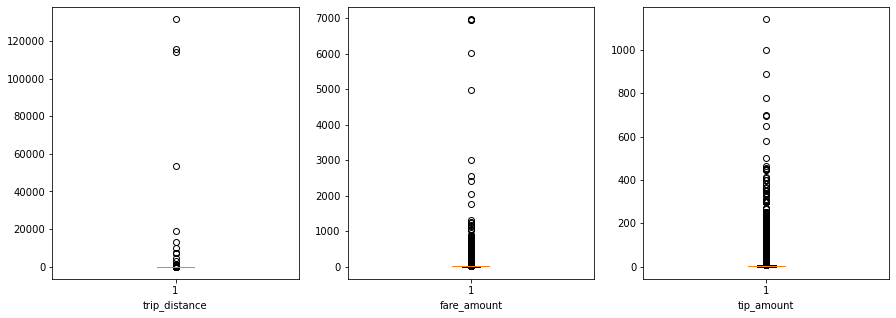

In [40]:
cols = ['trip_distance', 'fare_amount', 'tip_amount']
fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].boxplot(sub_df[cols[0]])
axs[0].set_xlabel(cols[0])
axs[1].boxplot(sub_df[cols[1]])
axs[1].set_xlabel(cols[1])
axs[2].boxplot(sub_df[cols[2]])
axs[2].set_xlabel(cols[2])
plt.show()

In [41]:
# check some unrealistic data 
sub_df[sub_df.trip_distance > 10000]

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount
1243986,2021-01-31 06:54:06,2021-01-31 07:16:38,114328.20,78,107,2,26.30,0.00
1934731,2021-02-13 19:44:23,2021-02-13 20:18:37,115928.92,165,232,2,22.24,0.00
5379616,2021-04-12 12:31:07,2021-04-12 13:04:44,131652.15,126,263,2,22.72,0.00
9845608,2021-06-06 17:58:47,2021-06-06 18:53:17,13155.52,167,170,2,20.80,0.00
24756690,2021-11-05 19:08:41,2021-11-05 19:12:58,18867.90,68,68,2,17.15,0.00
38958416,2022-03-24 13:56:56,2022-03-24 13:58:14,53440.55,193,193,1,26.55,5.47


In [42]:
sub_df[sub_df.fare_amount > 1000]

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount
108758,2021-01-04 16:04:51,2021-01-04 16:15:01,2.05,140,236,1,6960.5,696.48
764804,2021-01-20 11:22:05,2021-01-20 19:47:56,427.70,4,265,1,1128.5,1140.44
1491667,2021-02-04 17:25:03,2021-02-04 17:47:01,2.62,161,231,2,6965.0,0.00
1777653,2021-02-10 19:00:54,2021-02-11 16:24:09,5.85,100,236,2,4969.0,0.00
4296632,2021-03-27 17:09:56,2021-03-27 17:23:42,1.60,238,41,2,6010.0,0.00
4431095,2021-03-30 12:12:07,2021-03-30 13:53:50,964.27,260,146,2,2413.0,0.00
6566691,2021-04-29 11:04:15,2021-04-29 12:31:00,821.54,262,262,2,2056.0,0.00
8877219,2021-05-26 23:13:15,2021-05-27 12:59:30,16.03,154,28,2,1164.0,0.00
14435349,2021-07-27 13:08:58,2021-07-29 08:19:04,25.77,138,25,2,1320.0,0.00
22101678,2021-10-14 05:32:26,2021-10-14 14:48:37,709.88,183,265,2,1217.0,0.00


In [43]:
sub_df[sub_df.tip_amount > 400]

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount
108758,2021-01-04 16:04:51,2021-01-04 16:15:01,2.05,140,236,1,6960.5,696.48
764804,2021-01-20 11:22:05,2021-01-20 19:47:56,427.70,4,265,1,1128.5,1140.44
4312182,2021-03-27 20:47:32,2021-03-27 21:29:33,27.30,265,161,1,72.0,700.00
11917518,2021-06-29 16:56:20,2021-06-29 17:29:23,14.45,132,82,1,41.5,449.21
16293637,2021-08-15 23:08:30,2021-08-15 23:49:52,14.50,237,67,1,44.5,444.50
20799159,2021-10-01 14:07:46,2021-10-01 14:22:20,1.17,137,164,1,10.0,448.44
21184585,2021-10-05 11:30:49,2021-10-05 11:47:30,2.30,246,114,1,12.0,500.00
25021517,2021-11-08 02:41:23,2021-11-08 02:45:13,0.70,162,230,1,4.5,999.99
25143574,2021-11-09 10:39:19,2021-11-09 10:42:11,0.70,263,75,1,4.5,780.00
27068488,2021-11-26 03:54:02,2021-11-26 04:10:06,7.10,114,257,1,22.0,400.04


In [46]:
# continuous cleaning
sub_df = sub_df[(sub_df.trip_distance < 1000) \
              & (sub_df.fare_amount < 1000) \
              & (sub_df.tip_amount < 400) ]
sub_df.shape

(40803777, 8)

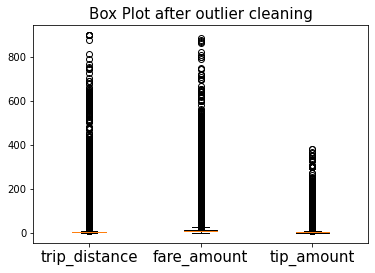

In [47]:
# show the tips after remove outliers
fig, ax = plt.subplots()
ax.boxplot(sub_df[cols])
ax.set_xticklabels(cols, fontsize=15)
plt.title('Box Plot after outlier cleaning',fontsize=15)
# fig.savefig("Box Plot after outlier removed.png")
plt.show()

#### 3.3 Remove Outliers


In [48]:
# IQR = 0.75quantile - 0.25quantile
Q0 = sub_df[cols].quantile(0.05)
Q1 = sub_df[cols].quantile(0.25)
Q3 = sub_df[cols].quantile(0.75)
Q4 = sub_df[cols].quantile(0.95)
IQR = Q3 - Q1
print("Q0: ", Q0)
print("Q1: ", Q1)
print("Q3: ", Q3)
print("Q4: ", Q4)
print("IQR: ", IQR)


Q0:  trip_distance    0.56
fare_amount      4.50
tip_amount       0.00
Name: 0.05, dtype: float64
Q1:  trip_distance    1.1
fare_amount      6.5
tip_amount       0.5
Name: 0.25, dtype: float64
Q3:  trip_distance     3.20
fare_amount      14.50
tip_amount        3.06
Name: 0.75, dtype: float64
Q4:  trip_distance    11.48
fare_amount      37.00
tip_amount        7.27
Name: 0.95, dtype: float64
IQR:  trip_distance    2.10
fare_amount      8.00
tip_amount       2.56
dtype: float64


In [49]:
removed_df = sub_df[~((sub_df[cols] < (Q1 - 1.5 * IQR)) | (sub_df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
removed_df.shape

(35941751, 8)

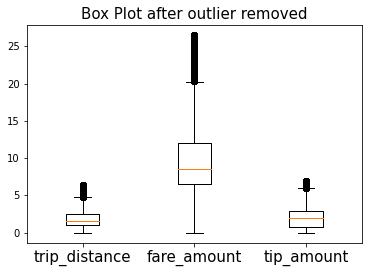

In [50]:
# show the tips after remove outliers
fig, ax = plt.subplots()
ax.boxplot(removed_df[cols])
ax.set_xticklabels(cols, fontsize=15)
plt.title('Box Plot after outlier removed',fontsize=15)
# fig.savefig("Box Plot after outlier removed.png")
plt.show()

In [51]:
removed_df.to_parquet('../data/processed_data/clean_data.parquet', compression='gzip')
removed_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,2,8.0,0.00
1,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,238,151,2,3.0,0.00
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,1,16.5,4.06
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,1,8.0,2.35
6,2021-01-01 00:00:28,2021-01-01 00:17:28,4.10,95,157,2,16.0,0.00


In [5]:
import pandas as pd
df = pd.read_parquet('../data/processed_data/clean_data.parquet')
df.shape

(35941751, 8)

In [6]:
df['minutes'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).to_numpy().astype('timedelta64[s]').astype(int)/60

In [7]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,minutes
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,2,8.0,0.00,6.033333
1,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,238,151,2,3.0,0.00,0.983333
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,1,16.5,4.06,16.533333
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,1,8.0,2.35,8.016667
6,2021-01-01 00:00:28,2021-01-01 00:17:28,4.10,95,157,2,16.0,0.00,17.000000


In [9]:
df['income_rate'] = (df['fare_amount'] + df['tip_amount'])/df['minutes']
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,minutes,income_rate
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,2,8.0,0.00,6.033333,1.325967
1,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,238,151,2,3.0,0.00,0.983333,3.050847
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,1,16.5,4.06,16.533333,1.243548
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,1,8.0,2.35,8.016667,1.291060
6,2021-01-01 00:00:28,2021-01-01 00:17:28,4.10,95,157,2,16.0,0.00,17.000000,0.941176


In [10]:
# Hour of day
df['hour_of_day'] = df.tpep_pickup_datetime.dt.hour

In [11]:
# Day of Week
df['day_of_week'] = df.tpep_pickup_datetime.dt.day_of_week

In [12]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,minutes,income_rate,hour_of_day,day_of_week
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,2,8.0,0.00,6.033333,1.325967,0,4
1,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,238,151,2,3.0,0.00,0.983333,3.050847,0,4
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,1,16.5,4.06,16.533333,1.243548,0,4
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,1,8.0,2.35,8.016667,1.291060,0,4
6,2021-01-01 00:00:28,2021-01-01 00:17:28,4.10,95,157,2,16.0,0.00,17.000000,0.941176,0,4


In [14]:
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,minutes,income_rate,hour_of_day,day_of_week
0,2021-01-01 00:30:10,2021-01-01 00:36:12,2.10,142,43,2,8.0,0.00,6.033333,1.325967,0,4
1,2021-01-01 00:51:20,2021-01-01 00:52:19,0.20,238,151,2,3.0,0.00,0.983333,3.050847,0,4
4,2021-01-01 00:31:49,2021-01-01 00:48:21,4.94,68,33,1,16.5,4.06,16.533333,1.243548,0,4
5,2021-01-01 00:16:29,2021-01-01 00:24:30,1.60,224,68,1,8.0,2.35,8.016667,1.291060,0,4
6,2021-01-01 00:00:28,2021-01-01 00:17:28,4.10,95,157,2,16.0,0.00,17.000000,0.941176,0,4


In [15]:
df[['minutes', 'income_rate']].describe()

,minutes,income_rate
count,3.594175e+07,3.594175e+07
mean,1.338610e+01,inf
std,6.321655e+01,NaN
min,-1.350846e+05,-1.633333e+00
25%,6.383333e+00,9.192513e-01
50%,9.950000e+00,1.081043e+00
75%,1.481667e+01,1.302554e+00
max,2.933652e+04,inf


In [16]:
df = df[(df.income_rate > 0) & (df.income_rate < 10) & (df.income_rate < 10)&(df.income_rate > 0)]

In [18]:
df.shape

(35908765, 12)

In [20]:
df.to_parquet('../data/processed_data/data.parquet', compression='gzip')

# Weather data

In [22]:
import pandas as pd
import numpy as np

In [25]:
weather_2021_df = pd.read_csv('../data/weather/2021.csv')
print("weather_df 2021 shape ",weather_2021_df.shape)
weather_2022_df = pd.read_csv('../data/weather/2022.csv')
print("weather_df 2022 shape ",weather_2022_df.shape)
weather_df=pd.concat([weather_2021_df,weather_2022_df])
print("weather_df 2021&2022 shape ",weather_df.shape)
weather_df.head()

weather_df 2021 shape  (13229, 100)
weather_df 2022 shape  (8440, 100)
weather_df 2021&2022 shape  (21669, 102)


/tmp/ipykernel_18988/2801569551.py:1: DtypeWarning: Columns (36,43,44,45,46,50,58) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_2021_df = pd.read_csv('../data/weather/2021.csv')
/tmp/ipykernel_18988/2801569551.py:3: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,35,37,41,42,43,44,47,48,51,52,53,55,56,57,58,70,71,72,73,74,75,76,77,78,79,82,84,85,86,88,89,95,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_2022_df = pd.read_csv('../data/weather/2022.csv')


,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,OE1,OE2,OE3,RH1,RH2,RH3,REM,EQD,AW5,MW3
0,74486094789,2021-01-01T00:00:00,4,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,SYN08074486 32566 83212 10050 21028 30249 4026...,NaN,NaN,NaN
1,74486094789,2021-01-01T00:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET10612/31/20 19:51:03 METAR KJFK 010051Z 320...,NaN,NaN,NaN
2,74486094789,2021-01-01T01:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET10612/31/20 20:51:03 METAR KJFK 010151Z 350...,D01 0ADE726,NaN,NaN
3,74486094789,2021-01-01T02:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,NaN,NaN,MET11212/31/20 21:51:03 METAR KJFK 010251Z 340...,D01 0ADE726,NaN,NaN
4,74486094789,2021-01-01T03:00:00,4,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-12,99999,V020,...,NaN,NaN,NaN,NaN,NaN,NaN,SYN06474486 32966 23407 10022 21044 30276 4028...,NaN,NaN,NaN


In [46]:
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE'])
sub_weather_df  = weather_df [(weather_df.QUALITY_CONTROL =='V030')&(weather_df.DATA_TIME <'2022-05-01 00:00:00') ]
sub_weather_df.shape

(13892, 104)

In [47]:
sub_weather_df.tail()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,OE3,RH1,RH2,RH3,REM,EQD,AW5,MW3,DATA_TIME,DATE_TIME
4466,74486094789,2022-04-30T20:29:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-16,KJFK,V030,...,NaN,NaN,NaN,NaN,MET10004/30/22 15:29:02 SPECI KJFK 302029Z 180...,NaN,NaN,NaN,2022-04-30 20:29:00,2022-04-30 20:29:00
4467,74486094789,2022-04-30T20:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,MET11204/30/22 15:51:02 METAR KJFK 302051Z 190...,NaN,NaN,NaN,2022-04-30 20:51:00,2022-04-30 20:51:00
4469,74486094789,2022-04-30T21:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,MET09504/30/22 16:51:02 METAR KJFK 302151Z 190...,NaN,NaN,NaN,2022-04-30 21:51:00,2022-04-30 21:51:00
4470,74486094789,2022-04-30T22:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,MET09804/30/22 17:51:02 METAR KJFK 302251Z 190...,D01 0ADE726,NaN,NaN,2022-04-30 22:51:00,2022-04-30 22:51:00
4471,74486094789,2022-04-30T23:51:00,7,40.63915,-73.7639,2.7,"JFK INTERNATIONAL AIRPORT, NY US",FM-15,KJFK,V030,...,NaN,NaN,NaN,NaN,MET11604/30/22 18:51:02 METAR KJFK 302351Z 190...,D01 0ADE726,NaN,NaN,2022-04-30 23:51:00,2022-04-30 23:51:00


In [5]:
# converting code for weather data. 
# reference link: https://github.com/msw17002/msw17002-Integrated-Surface-Dataset-Extraction-for-Small-Domains/
WS_TH = 2*0.514444
# The minimum gust speed reported by ASOS is 14 knots.
WG_TH = 14*0.514444
def Temperature_Delim_Calc_C(Temperature_Cell): #TEMPERATURE
    T2_C = np.nan
    if len(Temperature_Cell["TMP"])>0: # SFC TEMPERATURE
        Temp_Obs = Temperature_Cell["TMP"].split(',')
        if Temp_Obs[1] == '0' or Temp_Obs[1] == '1' or Temp_Obs[1] == '4' or Temp_Obs[1] == '5' \
        or Temp_Obs[1] == '9' or Temp_Obs[1].isalpha():
            T2_C = float(Temp_Obs[0])/10 #celsius
            if T2_C > 100:
                T2_C = np.nan
    return (T2_C)

def DewPoint_Delim_Calc_C(DewPoint_Cell): #DEW POINT TEMPERATURE
    DP2_C = np.nan
    if len(DewPoint_Cell["DEW"])>0:
        DP_Obs = DewPoint_Cell["DEW"].split(',')
        if DP_Obs[1] == '0' or DP_Obs[1] == '1' or DP_Obs[1] == '4' or DP_Obs[1] == '5' \
        or DP_Obs[1] == '9' or DP_Obs[1].isalpha():
            DP2_C = float(DP_Obs[0])/10
            if DP2_C > 100:
                DP2_C = np.nan
    return (DP2_C)

def WindGust_Delim_Calc_ms(WindGust_Cell): #WIND GUST
    WG_ms = np.nan
    if len(WindGust_Cell["OC1"])>0: 
        WG_Obs = WindGust_Cell["OC1"].split(',')
        if WG_Obs[1] == '0' or WG_Obs[1] == '1' or WG_Obs[1] == '4' or WG_Obs[1] == '5' \
        or WG_Obs[1] == '9' or WG_Obs[1].isalpha():
            WG_ms = float(WG_Obs[0])/10 #celsius
            if WG_ms > 100:
                WG_ms = np.nan
            elif WG_ms<WG_TH:
                WG_ms = np.nan
    return (WG_ms)

def WindSp_WindDir_Calc_ms_deg(Wind_Cell): #WIND SPEED | WIND DIRECTION
    wsms_wddeg = np.nan,np.nan
    if len(Wind_Cell["WND"])>0:
        Wind_Obs = Wind_Cell["WND"].split(',')
        if Wind_Obs[1] == '0' or Wind_Obs[1] == '1' or Wind_Obs[1] == '4' or Wind_Obs[1] == '5' \
        or Wind_Obs[1] == '9' or Wind_Obs[1].isalpha():
            if Wind_Obs[2] == "N":
                wsms_wddeg = float(Wind_Obs[3])/10,float(Wind_Obs[0]) #degrees 
            elif Wind_Obs[2] == "C" or Wind_Obs[2] == '9':
                wsms_wddeg = np.nan,np.nan
        if wsms_wddeg[0]<WS_TH:
            wsms_wddeg = np.nan,np.nan
        elif wsms_wddeg[0]>100:
            wsms_wddeg = np.nan,np.nan
        elif wsms_wddeg[1]>361:
            wsms_wddeg = np.nan,np.nan
    return (wsms_wddeg) 

def StationPres_Alt_Calc_hpa(Pressure_Cell): #STATION PRESSURE
    SP_hpa = np.nan
    if len(Pressure_Cell["MA1"])>0:
        Pressure = Pressure_Cell["MA1"].split(',')
        if Pressure[3] == '0' or Pressure[3] == '1' or Pressure[3] == '4' or Pressure[3] == '5' \
        or Pressure[3] == '9' or Pressure[3].isalpha():
            SP_hpa = (float(Pressure[2])/10)*100 
            if SP_hpa > 200000:
                SP_hpa = np.nan
    return (SP_hpa)  

In [51]:
converted_weather_df=pd.DataFrame(columns=['DATE_TIME','TEMPERATURE','Dew_Point',"Wind_Direction","Wind_Speed"])
for i in range(len(sub_weather_df)):
                    # metadata for the observations that match the query time
    QCLCD_tm      = sub_weather_df.iloc[i,:]
    Date_Obs      = QCLCD_tm["DATE_TIME"]
    T2_C          = Temperature_Delim_Calc_C(QCLCD_tm)                    #2-M TEMPERATURE celsius
    Td_C          = DewPoint_Delim_Calc_C(QCLCD_tm)                       #2-M DEW POINT TEMPERATURE celsius
    (WSms,WDdeg)  = WindSp_WindDir_Calc_ms_deg(QCLCD_tm)                  #WIND DIRECTION degrees | WIND SPEED m/s
    # SP_hpa        = StationPres_Alt_Calc_hpa(QCLCD_tm)                    #STATION PRESSURE hpa
    converted_weather_df.loc[len(converted_weather_df.index)]=[Date_Obs,T2_C,Td_C,WDdeg,WSms]

In [50]:
converted_weather_df.head()

,DATE,TEMPERATURE,Dew_Point,Wind_Direction,Wind_Speed
0,2021-01-01 00:51:00,4.4,-3.3,320.0,6.7
1,2021-01-01 01:51:00,3.9,-4.4,350.0,4.6
2,2021-01-01 02:51:00,2.2,-4.4,340.0,3.6
3,2021-01-01 03:51:00,2.2,-3.9,340.0,5.1
4,2021-01-01 04:51:00,1.7,-4.4,350.0,4.6


In [52]:
converted_weather_df.to_csv('../data/weather/preprocessed_weather.csv')